<a href="https://colab.research.google.com/github/AKerby/dsci_325_module_7_more_data_management_in_python/blob/main/Aggregation%20in%20Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aggregation

In [11]:
import polars as pl

## What is aggregation?

The act of collapsing many rows into few rows.

## Example - Baseball pitching

In [12]:
url = "https://github.com/AKerby/dsci_325_module_7_more_data_management_in_python/raw/main/sample_data/baseball/core/Pitching.csv"
pitching = pl.read_csv(url)
pitching.head()

playerID,yearID,stint,teamID,lgID,W,L,G,GS,CG,SHO,SV,IPouts,H,ER,HR,BB,SO,BAOpp,ERA,IBB,WP,HBP,BK,BFP,GF,R,SH,SF,GIDP
str,i64,i64,str,str,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,str,f64,str,i64,str,i64,i64,i64,i64,str,str,str
"""bechtge01""",1871,1,"""PH1""","""NA""",1,2,3,3,2,0,0,78,43,23,0,11,1,null,7.96,null,7,null,0,146,0,42,null,null,null
"""brainas01""",1871,1,"""WS3""","""NA""",12,15,30,30,30,0,0,792,361,132,4,37,13,null,4.5,null,7,null,0,1291,0,292,null,null,null
"""fergubo01""",1871,1,"""NY2""","""NA""",0,0,1,0,0,0,0,3,8,3,0,0,0,null,27.0,null,2,null,0,14,0,9,null,null,null
"""fishech01""",1871,1,"""RC1""","""NA""",4,16,24,24,22,1,0,639,295,103,3,31,15,null,4.35,null,20,null,0,1080,1,257,null,null,null
"""fleetfr01""",1871,1,"""NY2""","""NA""",0,1,1,1,1,0,0,27,20,10,0,3,0,null,10.0,null,0,null,0,57,0,21,null,null,null


## Simple Aggregation

A **simple aggregation** collapses all rows into one row.

<img src="https://github.com/WSU-DataScience/dsci_325_module_7_more_data_management_in_python/raw/main/img/simple_aggregation.png" width=800>

### Simple aggregation with `df.select`

In [13]:
(pitching
  .select([pl.col('ERA').mean().alias('Mean Hits'),
           pl.col('ERA').std().alias('SD Hits'),
           pl.col('W').min().alias('Min Wins'),
           pl.col('W').max().alias('Max Wins'),
          ])
)

Mean Hits,SD Hits,Min Wins,Max Wins
f64,f64,i64,i64
5.11792,5.466654,0,60


### Coding Best Practice - Spreading code over many lines improves readability

<img src="https://github.com/WSU-DataScience/dsci_325_module_7_more_data_management_in_python/raw/main/img/readable_simple_aggregation.png" width="600">

In [14]:
(pitching
  .select([pl.col('ERA')
             .mean()
             .alias('Mean Hits'),
           pl.col('ERA')
             .std()
             .alias('SD Hits'),
           pl.col('W')
             .min()
             .alias('Min Wins'),
           pl.col('W')
             .max()
             .alias('Max Wins'),
          ])
)

Mean Hits,SD Hits,Min Wins,Max Wins
f64,f64,i64,i64
5.11792,5.466654,0,60


### What makes this a simple aggregation?

<img src="https://github.com/WSU-DataScience/dsci_325_module_7_more_data_management_in_python/raw/main/img/identify_simple_aggregation.png" width="600">

#### Simple aggregation with a filter.

In [15]:
(pitching
  .select([pl.col('W')
             .filter(pl.col('yearID') >= 1946)
             .mean()
             .alias('Avg Wins per Season (post WW2)'),
           pl.col('W')
             .filter((1918 <= pl.col('yearID')) & (pl.col('yearID') <= 1938))
             .mean()
             .alias('Avg Wins per Season (Interwar)'),
          ])
)

Avg Wins per Season (post WW2),Avg Wins per Season (Interwar)
f64,f64
4.062594,5.606054


## <font color="red"> Exercise 7.1.1 </font>

The [dead ball era](https://en.wikipedia.org/wiki/Dead-ball_era) in MLB includes the year from about 1900 to 1918, which was known for a low number of runs per game.  After this period, the number of runs per game increased dramatically and one possible reason for this change was a changes made to the baseball at the start of the 1920 season.    

**Tasks:** Complete that following tasks using `polars`

* Compute the average runs allowed per pitcher (column `R`) for the following two ranges of years:
    * 1900-1919 and
    * 1920-1939.  
* Is there evidence of a difference in the number of runs allowed for each era?

In [ ]:
# Your code here

> *Your thoughts here*

## Group and Aggregate

Group and aggregate

* combines multiple filter + aggregates
* considers all possible groups.

<img src="https://github.com/WSU-DataScience/dsci_325_module_7_more_data_management_in_python/raw/main/img/group_and_aggregate.png" width=800>

## Using `when/then` to classify the years

In [25]:
pl.Config.with_columns_kwargs = True

eras = (pitching
        .select(['yearID', 'R'])
        .filter((pl.col('yearID') >= 1900) & (pl.col('yearID') < 1939))
        .with_columns(era = pl.when(pl.col('yearID') < 1920)
                              .then(pl.lit('dead ball'))
                              .otherwise(pl.lit('live ball'))
                  )
       )
eras.head()

yearID,R,era
i64,i64,str
1900,16,"""dead ball"""
1900,151,"""dead ball"""
1900,111,"""dead ball"""
1900,195,"""dead ball"""
1900,224,"""dead ball"""


<img src="https://github.com/WSU-DataScience/dsci_325_module_7_more_data_management_in_python/raw/main/img/filter_group_aggregate.png" width=800>

What we did here is actually `filter + groupby + aggregate`

## Using `df.group_by` and `df.agg`

In [27]:
mean_runs = (eras
             .group_by(pl.col('era'))
             .agg(pl.col('R').mean().alias('mean_runs'))
            )
mean_runs

era,mean_runs
str,f64
"""dead ball""",49.707696
"""live ball""",55.76718


## Visualizing the data with `seaborn`

<Axes: xlabel='era', ylabel='mean_runs'>

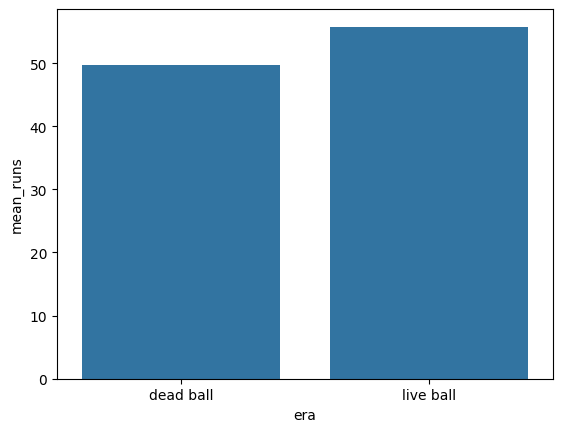

In [28]:
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
sns.barplot(x = "era", y="mean_runs", data=mean_runs.to_pandas()) #seaborn needs a pandas.Dataframe

## <font color="red"> Exercise 7.1.2 </font>

Compose the two queries into one piped expression (filter + mutate + group_by + summarise)

In [ ]:
# Your code here

## Grouping by more than one category

* `group_by` accepts multiple columns
* Groups all combinations

## Example - Find all teams with 100+ wins in a season

In [30]:
(pitching
 .select(['yearID',
          'teamID',
          'W',
         ])
 .group_by(['yearID',
           'teamID',
          ])
 .agg(pl.col('W')
        .sum()
        .alias('total_wins')
     )
 .filter(pl.col('total_wins') >= 100)
 .sort([pl.col('yearID'),
        pl.col('total_wins'),
       ],
       descending=[True, True])
).head(10)

yearID,teamID,total_wins
i64,str,i64
2019,"""HOU""",107
2019,"""LAN""",106
2019,"""NYA""",103
2019,"""MIN""",101
2018,"""BOS""",108
2018,"""HOU""",103
2018,"""NYA""",100
2017,"""LAN""",104
2017,"""CLE""",102


## The last comparison might not be fair

Comparison is only fair if pitchers all pitch the same number of outs/games/innings.  Let's see if there is a difference between the eras in terms of outs pitched (`IPouts`).

In [32]:
mean_outs = (pitching
             .select(['IPouts',
                      'yearID',
                     ])
             .filter((pl.col('yearID') >= 1900) & (pl.col('yearID') < 1940))
             .with_columns(era = pl.when(pl.col('yearID') < 1920)
                                   .then(pl.lit("dead ball"))
                                   .otherwise(pl.lit("after dead ball")))
             .group_by(pl.col('era'))
             .agg(pl.col('IPouts').mean().alias('mean_outs'))
            )
mean_outs.head()

era,mean_outs
str,f64
"""dead ball""",336.067023
"""after dead bal…",303.468541


<Axes: xlabel='era', ylabel='mean_outs'>

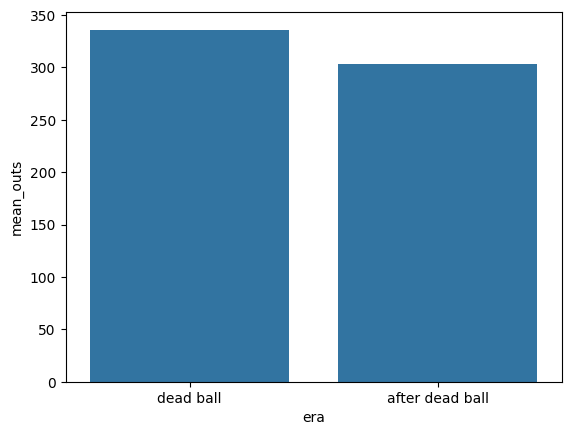

In [33]:
sns.barplot(x = "era", y="mean_outs", data=mean_outs.to_pandas())

## A more fair comparison

Instead of comparing the era's on a per-pitcher basis, let's compare on a per year basis.  We will

1. Compute the total runs and total IPouts per year.
2. Compute the ratio of these totals for each year.
3. Compute the average value of the ratio for each era

In [35]:
mean_runs_per_out = (pitching
                     .select([pl.col('IPouts'), pl.col('yearID'), pl.col('R')])
                     .filter((pl.col('yearID') >= 1900) & (pl.col('yearID') < 1940))
                     .group_by(pl.col('yearID'))
                     .agg([pl.col('R').sum().alias('total_runs'),
                           pl.col('IPouts').sum().alias('total_ipouts')
                          ])
                     .with_columns(runs_per_out = pl.col('total_runs')/pl.col('total_ipouts'),
                                   era = pl.when(pl.col('yearID') < 1920)
                                           .then(pl.lit("dead ball"))
                                           .otherwise(pl.lit("after dead ball")))
                     .group_by(pl.col('era'))
                     .agg(pl.col('runs_per_out').mean().alias('mean_runs_per_out'))
                    )
mean_runs_per_out

era,mean_runs_per_out
str,f64
"""after dead bal…",0.182218
"""dead ball""",0.14992


<AxesSubplot:xlabel='era', ylabel='mean_runs_per_out'>

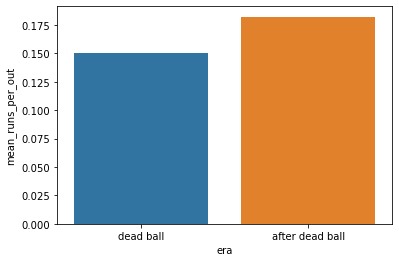

In [ ]:
sns.barplot(x = "era", y="mean_runs_per_out", data=mean_runs_per_out.to_pandas())

## <font color="red"> Exercise 7.1.3 </font>

It would be easier to understand this result if we were computing runs on a per-game basis.  Redo the last problem, both this time compute `mean_runs_per_9_innings`.  **Hint:** There are 27 outs in a 9 inning game.

In [ ]:
# Your code here

## <font color="red"> Exercise 7.1.4 </font>

Compute and plot the average home runs per game allowed per year for all years in the pitching table.  To accomplish this task, you should

1. Aggregate total `HR` and `IPouts` for each year.
1. Create a `games_pitched`, which is computed by dividing total inning pitched outs `IPouts` by 27, the number of outs in a regular game.
2. Create a `hr_per_game` column by dividing the total `HR` for each year by `games_pitched` for each year.
4. Make line plot of the results.  You can use [seaborn's lineplot](https://seaborn.pydata.org/generated/seaborn.lineplot.html) to make the graph.

In [ ]:
# Your code here